In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Import Successful!')

Import Successful!


In [3]:
file_path = r'C:\Users\JAMES\OneDrive\Desktop\Data Analyst Associate Certificate -- Datacamp\food_claims.csv'
data = pd.read_csv(file_path)

print('data load successful')

data load successful


In [4]:
data.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [8]:
# Removing the string values in the amount_paid column to make it a float.
data['claim_amount'] = data['claim_amount'].str.extract(r'([\d,]+(\.\d{1,2})?)')[0]

# Convert the column to a numeric data type (float)
data['claim_amount'] = data['claim_amount'].str.replace(',', '').astype(float)

data.head()

AttributeError: Can only use .str accessor with string values!

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 125.1+ KB


In [10]:
#checking for missing values

missing_values = data.isna().sum()
print(missing_values)


claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64


In [11]:
#checking and validating the data_types

data_types = data.dtypes
print(data_types)

claim_id                  int64
time_to_close             int64
claim_amount            float64
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases             object
cause                    object
dtype: object


In [12]:
#checking for the total number of rows and columns

num_rows, num_columns = data.shape

print(f'Total number of rows: {num_rows}')
print(f'Total number of columns: {num_columns}')


Total number of rows: 2000
Total number of columns: 8


In [13]:
data.shape

(2000, 8)

"Apparently, we've got two columns with null values -- linked_cases and amount_paid"

In [16]:
#checking for unique values in each text column

distinct_location = data['location'].unique()
distinct_linked_cases = data['linked_cases'].unique()
distinct_causes = data['cause'].unique()


print(distinct_location)
print(distinct_linked_cases)
print(distinct_causes)

['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']
[False  True]
['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']


In [20]:
#count the number of inconsistent values in the cause column and group them

causes = data.groupby('cause')['cause'].count()

print(causes)

cause
 Meat          14
VEGETABLES     16
meat          943
unknown       713
vegetable     314
Name: cause, dtype: int64


In [27]:
#removing trailing spaces and replacing the inconsistent values with the consistent ones.

data['cause'] = data['cause'].str.strip()

data['cause'].replace('Meat','meat',inplace=True)
data['cause'].replace('VEGETABLES','vegetable',inplace=True)

data.groupby('cause')['cause'].count()

cause
meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64

In [28]:
#replace missing values in the linked_cases column with the nominal value "False"

data['linked_cases'] = data['linked_cases'].fillna(False).astype(bool)

data.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases             0
cause                    0
dtype: int64

In [29]:
data.head(200)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
195,196,109,8944.47,8299.10,RECIFE,3,False,meat
196,197,174,8922.96,8039.87,SAO LUIS,5,True,vegetable
197,198,194,15700.36,13837.94,SAO LUIS,4,False,unknown
198,199,171,4552.15,3097.37,SAO LUIS,2,True,vegetable


In [30]:
#check the median distribution of each column

data.describe()

,claim_id,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,2000.000000,1964.000000,2000.000000
mean,1000.500000,185.56800,27156.965235,21541.975183,8.049500
std,577.494589,49.16339,16195.783099,12530.156509,4.087347
min,1.000000,76.00000,1637.940000,1516.720000,1.000000
25%,500.750000,158.00000,13758.952500,10995.950000,4.000000
50%,1000.500000,179.00000,24821.085000,20105.700000,8.000000
75%,1500.250000,204.00000,38581.350000,30709.350000,12.000000
max,2000.000000,518.00000,76106.800000,52498.750000,15.000000


In [31]:
#converting the amount_paid column to float and replacing its missing values with its median values
data['amount_paid'] = data['amount_paid'].astype('float64').fillna(round(data.amount_paid.median(), 2))

print('Replacement Successful')

Replacement Successful


In [32]:
#data validation

print(data.head())

print(data.info())

print(data.isna().sum())

   claim_id  time_to_close  claim_amount  amount_paid   location  \
0         1            317      74474.55     51231.37     RECIFE   
1         2            195      52137.83     42111.30  FORTALEZA   
2         3            183      24447.20     23986.30   SAO LUIS   
3         4            186      29006.28     27942.72  FORTALEZA   
4         5            138      19520.60     16251.06     RECIFE   

   individuals_on_claim  linked_cases      cause  
0                    15         False    unknown  
1                    12          True    unknown  
2                    10          True       meat  
3                    11         False       meat  
4                    11         False  vegetable  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close        

### Convert to a .csv file

In [42]:
#convert to csv
data.to_csv('vivendo_food_claims(1).csv')

# Analysis and Breakdowns

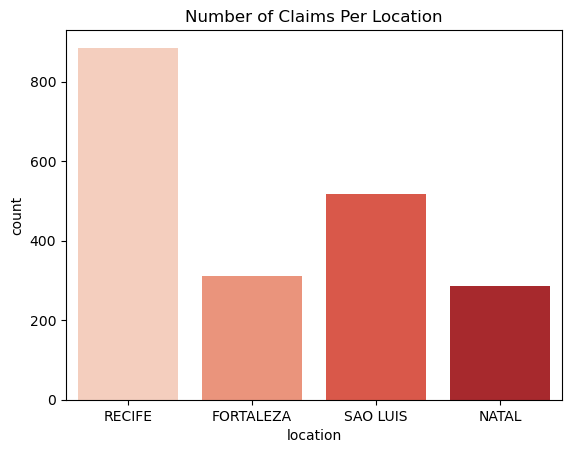

In [34]:
#create a visualization that groups the number of claims by categories
sns.countplot(x='location', data=data, palette='Reds')
plt.title('Number of Claims Per Location')

# Display the plot
plt.show()

This data has four distinct locations namely: Recife, Fortaleza, Sao Luis, and Natal. Recife has the highest number of claims, exceeding 800. The other locations were averaging between 250-500 claims within these locations.

My suggestion would be that the legal team takes a better check on all locations but pays more attention to Reciffe and discover the reason for the increased number of claims in that location. 

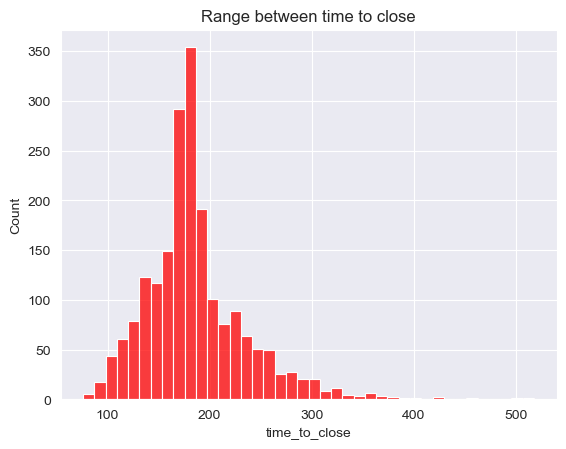

In [38]:
#creating a plot to determine the distribution between time_to_close and all claims

sns.set_style("darkgrid")

sns.histplot(data=data, x = 'time_to_close', bins = 40, color="#ff0000") 

plt.title('Range between time to close')


# Display the plot
plt.show()

The `time_to_close` for all claims spans a range from 76 to 518 days. Notably, the highest durations fall within the 90 to 300-day bracket, given that `time_to_close` is denoted in days.

Our observation underscores a right-skewed distribution. This is evident as the values cluster towards the left side of the histogram, with a pronounced tail extending to the right.

As a suggestion, it may be advantageous for the legal team to prioritize claims falling within the 90-300 day range, as this period exhibits a notably higher frequency of claims.

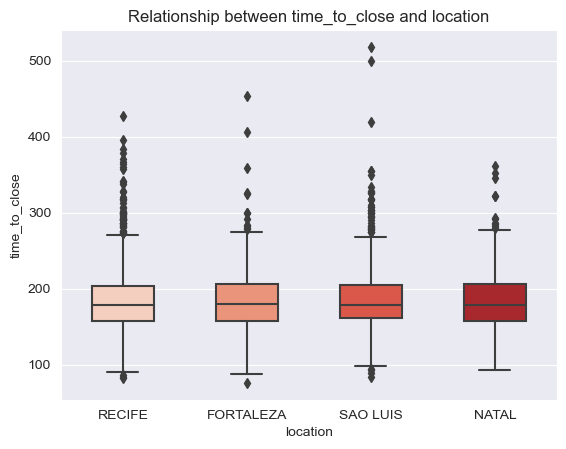

In [39]:
#creating a plot to show the relationship between time_to_close and location
sns.boxplot(data= data, x='location', y='time_to_close', palette='Reds', width=0.5)

plt.title('Relationship between time_to_close and location')
# Display the plot
plt.show()

Examining the correlation between time taken to close a claim and the corresponding location, we aim to analyze the variability in closure times across different places. Although the time to close can range from 90 to 100, a combined assessment of both variables is essential for contextual clarity.

We employ a box plot to illustrate this correlation, shedding light on the spread of closure times across locations, while also considering any outliers present in the dataset. In the provided plot, it's evident that the presence of outliers heavily influences the data, potentially complicating comparisons. High outliers indicate extended closure times for specific claims in a given location, whereas low outliers denote swift closures.

To facilitate a more straightforward comparison of the remaining data, we'll opt to exclude these outlier points. This adjustment will allow for a clearer assessment of closure times across locations.

Since there are outliers in our data, it's best to focus on a subset of our data specifically the areas with more distribution in our time_to_close column

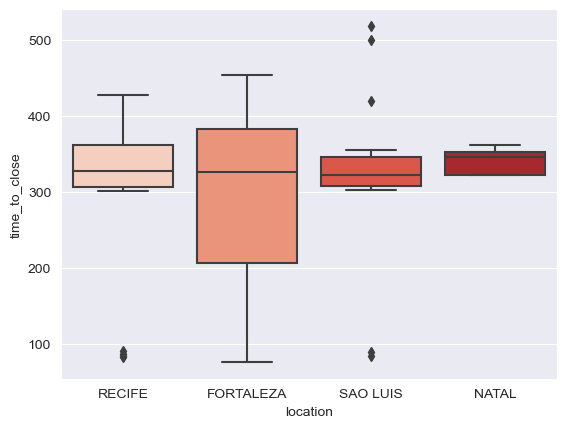

In [40]:
#create a subset that ranges between 90 and 300 for only time to close to remove outliers

data_improv = data.drop(data[(data['time_to_close'] > 90) & (data['time_to_close'] <= 300)].index)

# Creatng a plot for relationship between time to close and location without outliers

sns.boxplot(data= data_improv, x='location', y='time_to_close', palette='Reds')


# Display the plot
plt.show()

In the updated plot, we've omitted the outlier, allowing us to center our attention on the core data range. Upon closer inspection, SAO LUIS exhibits the greatest frequency of closure times. Surprisingly, its interquartile range for closure times is narrower compared to that of RECIFA and FORTALEZA. This implies that SAO LUIS might have lower closure times on average. Nevertheless, it's worth noting that this observation could be influenced by the fact that SAO LUIS boasts the highest number of locations. Consequently, the substantial quantity of locations with shorter closure times may contribute to a lower overall median.

# **Recommendations**

After a comprehensive analysis, we propose the following strategies for the legal team:

1. Prioritize locations where closure times range from 90 to 300 days.
2. Pay special attention to RECIFE and FORTALEZA, which exhibit prolonged closure times.
3. Delve into locations with swift closure times to discern any distinctive patterns compared to other areas in terms of claims processing.

To gain deeper insights, it is imperative to conduct further investigations to ascertain the true impact of location on time to close.